# Brain Tumor: Create Mask Image

https://www.kaggle.com/code/stpeteishii/brain-tumor-segmentation-label-to-mask-image

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import shutil

In [2]:
def copy_folder(src, dest):

    if not os.path.exists(src):
        print(f"Source folder '{src}' does not exist.")
        return

    if not os.path.exists(dest):
        os.makedirs(dest)

    try:
        shutil.copytree(src, dest, dirs_exist_ok=True)
        print(f"Successfully copied from '{src}' to '{dest}'.")
    except shutil.Error as e:
        print(f"Error occurred while copying: {e}")
    except OSError as e:
        print(f"OS error: {e}")

src_folder = "/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/images"
dest_folder = "training_images"

copy_folder(src_folder, dest_folder)

Successfully copied from '/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/images' to 'training_images'.


In [3]:
names=[]
paths=[]
for dirname, _, filenames in os.walk(dest_folder):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]
        names+=[filename[0:-4]]

In [4]:
!mkdir training_masks

In [5]:
def load_polygon_from_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        polygon_points = []
        labels=[]
        for line in lines:
            values = line.strip().split(' ')
            coords = list(map(float, values[1:]))
            points = [(coords[i], coords[i+1]) for i in range(0, len(coords), 2)]
            polygon_points.extend(points)
            labels+=[values[0]]
    return polygon_points,labels

In [6]:
def create_mask_image(image_path, relative_polygon_points, labels):
    image = Image.open(image_path).convert("RGBA")
    width, height = image.size
    mask = Image.new('L', image.size, 0) 
    draw = ImageDraw.Draw(mask)
    polygon_points = [(x * width, y * height) for x, y in relative_polygon_points]
    label=int(labels[0])
    mapping={0:255,1:200,2:150,3:100}
    draw.polygon(polygon_points, fill=mapping[label])
    return image, mask

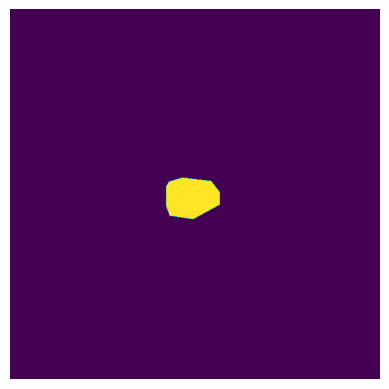

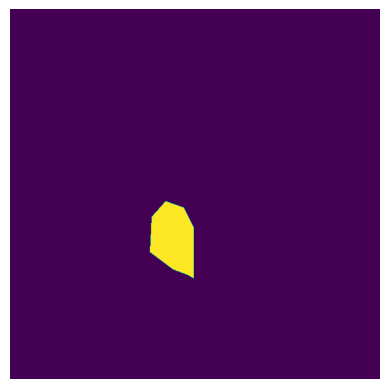

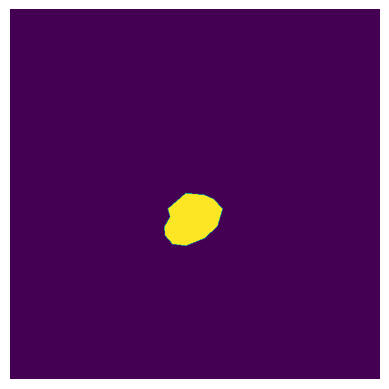

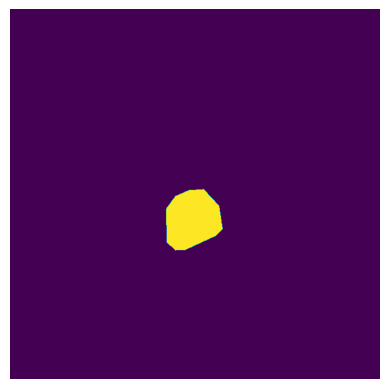

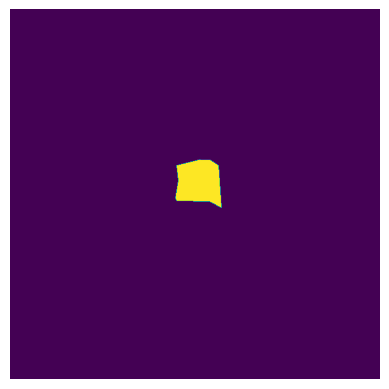

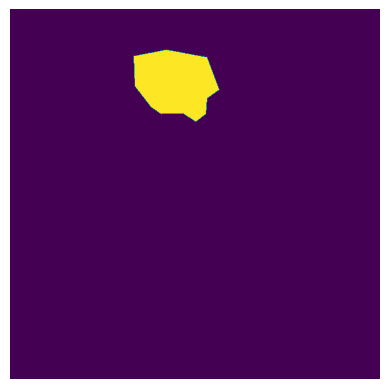

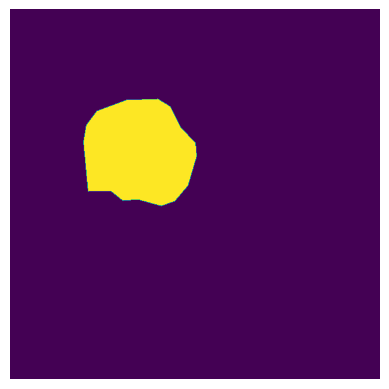

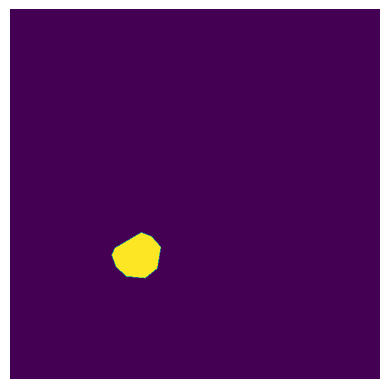

In [7]:
dir1='/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/train/labels'
t=0
SIZE=set()
for ipath, name in zip(paths, names):
    ppath = os.path.join(dir1, name + '.txt')
    polygons, labels = load_polygon_from_file(ppath)
    masked_image, mask = create_mask_image(ipath, polygons, labels)
    plt.imshow(mask)
    plt.axis('off') 
    plt.savefig(os.path.join('training_masks', name + '.jpg'), bbox_inches='tight', pad_inches=0)
    SIZE.add(mask.size)
    if t < 8:
        plt.show()
    else:
        plt.close()
    t += 1

In [8]:
print(SIZE)

{(640, 640)}


In [9]:
!ls training_images

Te-pi_0259_jpg.rf.54fc8552354c1d581a64963b72fb6e31.jpg
Te-pi_0260_jpg.rf.2d91745abd8433b5b043dfbe0f99b35a.jpg
Tr-piTr_0000_jpg.rf.a5fdc4ac03409741b9de345b7f578ad0.jpg
Tr-piTr_0002_jpg.rf.6900ad613d1d2278c472b19558290a9e.jpg
Tr-piTr_0003_jpg.rf.c666e364a6c405ab482f193bdf4c6a0d.jpg
Tr-piTr_0006_jpg.rf.0a165c638bbec1b0d959229db9fba43d.jpg
Tr-piTr_0007_jpg.rf.1fbeb27590f1a768137e9640456fb000.jpg
Tr-piTr_0008_jpg.rf.74893e49c476fa3850b57ec23d7fc271.jpg
Tr-piTr_0009_jpg.rf.5d5024f1ca5e7769e4a52ca5cf6e5c02.jpg
Tr-pi_1443_jpg.rf.7b25b18a464c79b3384c8457a3d3d667.jpg
Tr-pi_1445_jpg.rf.d7a34bb5dc65ee05ed36e34d5befd708.jpg
Tr-pi_1447_jpg.rf.78e0720477985c74f2a69e809c18f5dd.jpg
Tr-pi_1448_jpg.rf.4d0ce628e4c8e18fc29e14f3b4ac97b4.jpg
Tr-pi_1449_jpg.rf.402e03c9773e9f9960a6ad44a3dc9db0.jpg
Tr-pi_1452_jpg.rf.1309a069a026dc94029227e46601888a.jpg
Tr-pi_1453_jpg.rf.d27609b294f45a3df37fca8278c887a3.jpg
Tr-pi_1454_jpg.rf.62d6ecc2fac73476c8d479d7a5f6ff83.jpg
Tr-pi_1455_jpg.rf.077a48ae4a404b51afef93df0453e5dd.

In [10]:
!ls training_masks

Te-pi_0259_jpg.rf.54fc8552354c1d581a64963b72fb6e31.jpg
Te-pi_0260_jpg.rf.2d91745abd8433b5b043dfbe0f99b35a.jpg
Tr-piTr_0000_jpg.rf.a5fdc4ac03409741b9de345b7f578ad0.jpg
Tr-piTr_0002_jpg.rf.6900ad613d1d2278c472b19558290a9e.jpg
Tr-piTr_0003_jpg.rf.c666e364a6c405ab482f193bdf4c6a0d.jpg
Tr-piTr_0006_jpg.rf.0a165c638bbec1b0d959229db9fba43d.jpg
Tr-piTr_0007_jpg.rf.1fbeb27590f1a768137e9640456fb000.jpg
Tr-piTr_0008_jpg.rf.74893e49c476fa3850b57ec23d7fc271.jpg
Tr-piTr_0009_jpg.rf.5d5024f1ca5e7769e4a52ca5cf6e5c02.jpg
Tr-pi_1443_jpg.rf.7b25b18a464c79b3384c8457a3d3d667.jpg
Tr-pi_1445_jpg.rf.d7a34bb5dc65ee05ed36e34d5befd708.jpg
Tr-pi_1447_jpg.rf.78e0720477985c74f2a69e809c18f5dd.jpg
Tr-pi_1448_jpg.rf.4d0ce628e4c8e18fc29e14f3b4ac97b4.jpg
Tr-pi_1449_jpg.rf.402e03c9773e9f9960a6ad44a3dc9db0.jpg
Tr-pi_1452_jpg.rf.1309a069a026dc94029227e46601888a.jpg
Tr-pi_1453_jpg.rf.d27609b294f45a3df37fca8278c887a3.jpg
Tr-pi_1454_jpg.rf.62d6ecc2fac73476c8d479d7a5f6ff83.jpg
Tr-pi_1455_jpg.rf.077a48ae4a404b51afef93df0453e5dd.

In [11]:
src_folder = "/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/valid/images"
dest_folder = "validation_images"

copy_folder(src_folder, dest_folder)

Successfully copied from '/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/valid/images' to 'validation_images'.


In [12]:
names=[]
paths=[]
for dirname, _, filenames in os.walk(dest_folder):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]
        names+=[filename[0:-4]]

In [13]:
!mkdir validation_masks

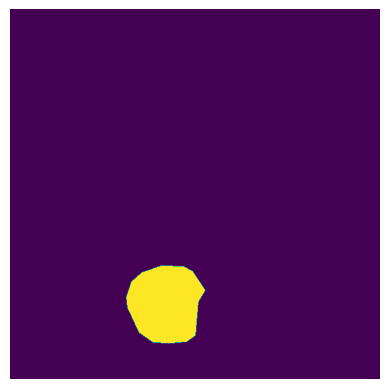

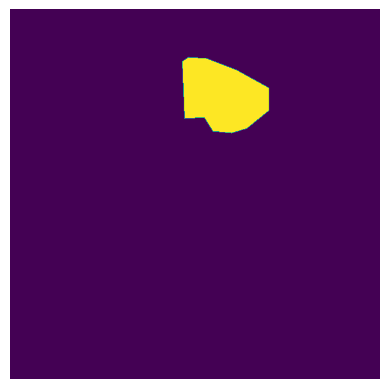

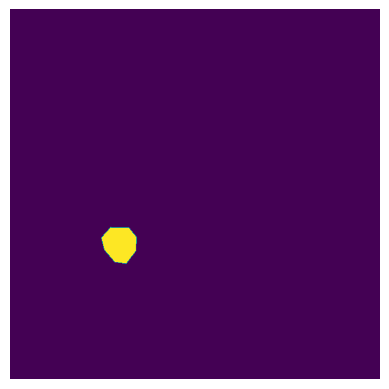

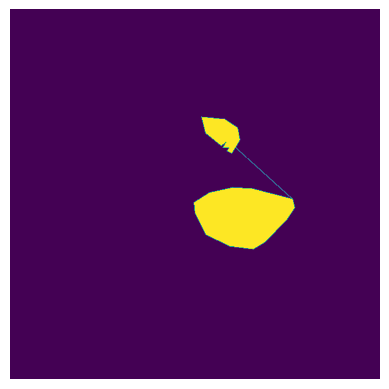

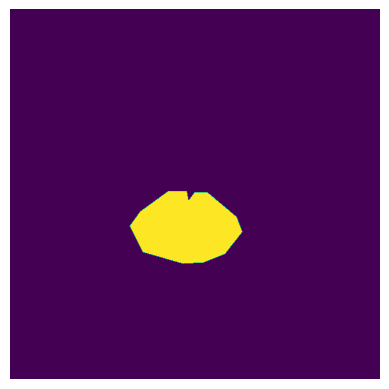

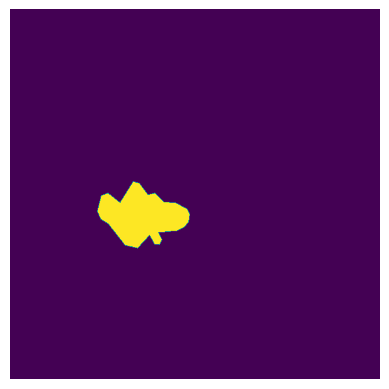

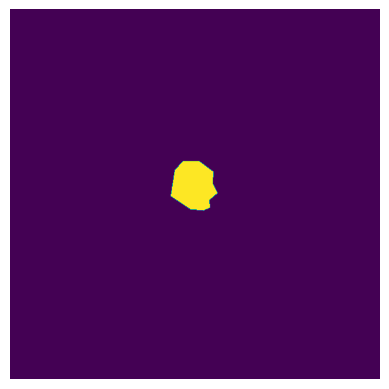

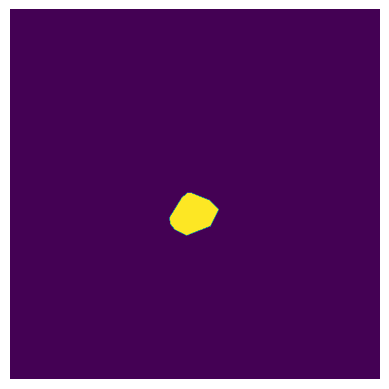

In [14]:
dir1='/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/valid/labels'
t=0
SIZE=set()
for ipath, name in zip(paths, names):
    ppath = os.path.join(dir1, name + '.txt')
    polygons, labels = load_polygon_from_file(ppath)
    masked_image, mask = create_mask_image(ipath, polygons, labels)
    plt.imshow(mask)
    plt.axis('off') 
    plt.savefig(os.path.join('validation_masks', name + '.jpg'), bbox_inches='tight', pad_inches=0)
    SIZE.add(mask.size)
    if t < 8:
        plt.show()
    else:
        plt.close()
    t += 1

In [15]:
!ls validation_images

Tr-piTr_0005_jpg.rf.f1fddbfd45ab51a65e0543b285dee20f.jpg
Tr-pi_1446_jpg.rf.ecc9c547603c989c257a7759ff53f27a.jpg
glioma12_jpg.rf.7a7fa1ffad85402faebfb41c8a72ecc4.jpg
glioma15_jpg.rf.a1b8fdac1bc80696c841a8d897bcb8ed.jpg
glioma18_jpg.rf.9dcb6ebeac50766c6d358d1e6882935c.jpg
glioma20_jpg.rf.953ce36ba7a850bbebb3ac10bcd28341.jpg
glioma22_jpg.rf.80d1dc0d09eb7c5619719657a1eeed2f.jpg
glioma24_jpg.rf.0e5a2fb3effba56e6acb73c28ad0702f.jpg
glioma29_jpg.rf.fc601b1fa965278754704d25439ac19b.jpg
glioma37_jpg.rf.cb4205aa91f2bc5b16e16689e8483593.jpg
glioma41_jpg.rf.cb2d96ff155125d8e5858191c2475513.jpg
glioma47_jpg.rf.1eb0ab4b637180ad0dc03018ba3db6bc.jpg
meningioma11_jpg.rf.d4cc769dea850bda6fa3f0ef00394abe.jpg
meningioma14_jpg.rf.c18519cae41bef0ec9bd2d0b2bbc2374.jpg
meningioma19_jpg.rf.5e14f02e5af0bd590ed34875ed60b431.jpg
meningioma25_jpg.rf.d000a0e117324c6fd6d7cfcb45e6af95.jpg
meningioma32_jpg.rf.c3ed8995070fa81464c73c14dd78f2f7.jpg
meningioma34_jpg.rf.56a9f547ef04f6d70fee172679498aaa.jpg
meningioma35_jpg

In [16]:
!ls validation_masks

Tr-piTr_0005_jpg.rf.f1fddbfd45ab51a65e0543b285dee20f.jpg
Tr-pi_1446_jpg.rf.ecc9c547603c989c257a7759ff53f27a.jpg
glioma12_jpg.rf.7a7fa1ffad85402faebfb41c8a72ecc4.jpg
glioma15_jpg.rf.a1b8fdac1bc80696c841a8d897bcb8ed.jpg
glioma18_jpg.rf.9dcb6ebeac50766c6d358d1e6882935c.jpg
glioma20_jpg.rf.953ce36ba7a850bbebb3ac10bcd28341.jpg
glioma22_jpg.rf.80d1dc0d09eb7c5619719657a1eeed2f.jpg
glioma24_jpg.rf.0e5a2fb3effba56e6acb73c28ad0702f.jpg
glioma29_jpg.rf.fc601b1fa965278754704d25439ac19b.jpg
glioma37_jpg.rf.cb4205aa91f2bc5b16e16689e8483593.jpg
glioma41_jpg.rf.cb2d96ff155125d8e5858191c2475513.jpg
glioma47_jpg.rf.1eb0ab4b637180ad0dc03018ba3db6bc.jpg
meningioma11_jpg.rf.d4cc769dea850bda6fa3f0ef00394abe.jpg
meningioma14_jpg.rf.c18519cae41bef0ec9bd2d0b2bbc2374.jpg
meningioma19_jpg.rf.5e14f02e5af0bd590ed34875ed60b431.jpg
meningioma25_jpg.rf.d000a0e117324c6fd6d7cfcb45e6af95.jpg
meningioma32_jpg.rf.c3ed8995070fa81464c73c14dd78f2f7.jpg
meningioma34_jpg.rf.56a9f547ef04f6d70fee172679498aaa.jpg
meningioma35_jpg

In [17]:
src_folder = "/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/test/images"
dest_folder = "testing_images"

copy_folder(src_folder, dest_folder)

Successfully copied from '/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/test/images' to 'testing_images'.


In [18]:
names=[]
paths=[]
for dirname, _, filenames in os.walk(dest_folder):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]
        names+=[filename[0:-4]]

In [19]:
!mkdir testing_masks

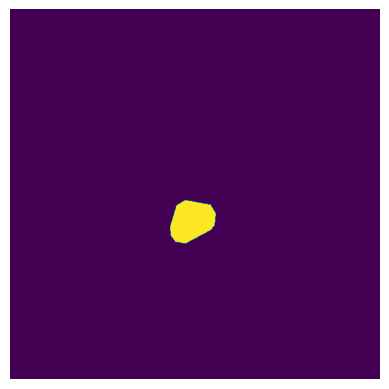

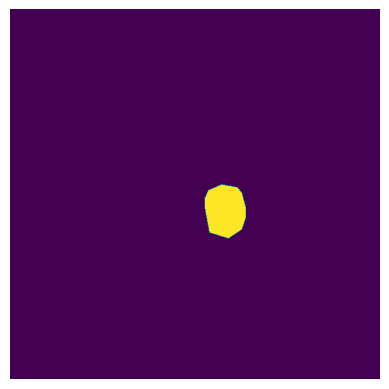

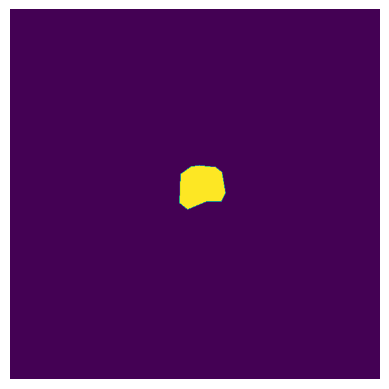

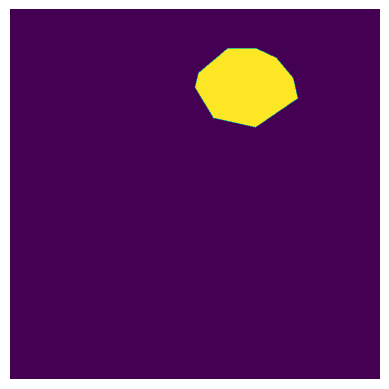

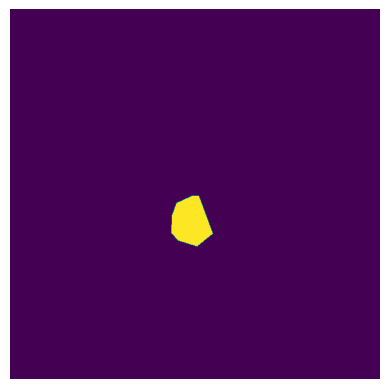

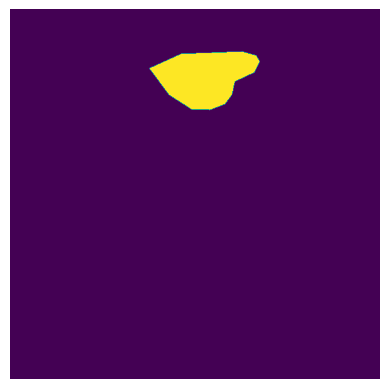

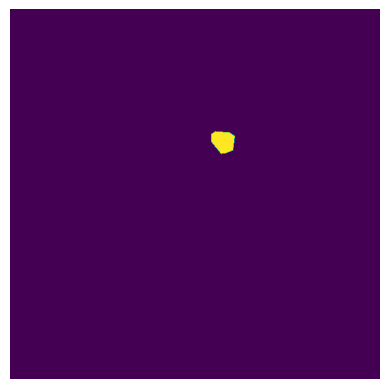

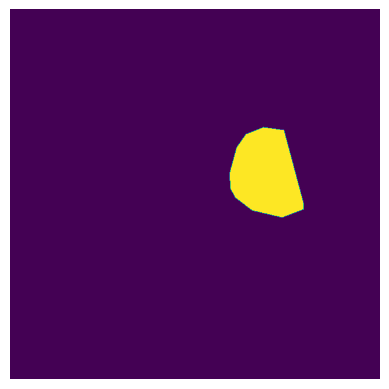

In [20]:
dir1='/kaggle/input/brain-tumor-mri-dataset/brain_tumor_dataset/brain_tumor_segmentation/test/labels'
t=0
SIZE=set()
for ipath, name in zip(paths, names):
    ppath = os.path.join(dir1, name + '.txt')
    polygons, labels = load_polygon_from_file(ppath)
    masked_image, mask = create_mask_image(ipath, polygons, labels)
    plt.imshow(mask)
    plt.axis('off') 
    plt.savefig(os.path.join('testing_masks', name + '.jpg'), bbox_inches='tight', pad_inches=0)
    SIZE.add(mask.size)
    if t < 8:
        plt.show()
    else:
        plt.close()
    t += 1

In [21]:
!ls testing_images

Tr-piTr_0004_jpg.rf.44dee87c8693e404a864ae4f4ee60595.jpg
Tr-pi_1444_jpg.rf.29369c8b378bfbdba901805c7f670dd1.jpg
Tr-pi_1450_jpg.rf.9f38c63beab032ac62d81304e081b55e.jpg
Tr-pi_1451_jpg.rf.bdbaeef9450ef6f04472750a4b0475e6.jpg
glioma23_jpg.rf.78dd5fa0343bf949a2595c8c81b71d34.jpg
glioma31_jpg.rf.fac420ecfbee938333cdf42e3d907fef.jpg
glioma32_jpg.rf.dba8c0edb6222e40f23539e0a9d6c589.jpg
glioma43_jpg.rf.0986aceb46d2e4a06604e7de2bf3c711.jpg
glioma7_jpg.rf.7a5656b6d095ce5846385f11f6b94046.jpg
meningioma1_jpg.rf.78a67cc6008a8b1fcd33dc5593cb4961.jpg
meningioma30_jpg.rf.a6d3c265ffd88a6714273ebedf11f28e.jpg
meningioma36_jpg.rf.acadc0b55106ed4d4e9f17c075e496d4.jpg
meningioma49_jpg.rf.2613e5acc1302d33552bb11db41f103d.jpg
meningioma8_jpg.rf.2b857d06b934098cdea86fbb41242fd2.jpg
pituitary40_jpg.rf.edcd1f95576f4980c7b5f4dc7350355b.jpg


In [22]:
!ls testing_masks

Tr-piTr_0004_jpg.rf.44dee87c8693e404a864ae4f4ee60595.jpg
Tr-pi_1444_jpg.rf.29369c8b378bfbdba901805c7f670dd1.jpg
Tr-pi_1450_jpg.rf.9f38c63beab032ac62d81304e081b55e.jpg
Tr-pi_1451_jpg.rf.bdbaeef9450ef6f04472750a4b0475e6.jpg
glioma23_jpg.rf.78dd5fa0343bf949a2595c8c81b71d34.jpg
glioma31_jpg.rf.fac420ecfbee938333cdf42e3d907fef.jpg
glioma32_jpg.rf.dba8c0edb6222e40f23539e0a9d6c589.jpg
glioma43_jpg.rf.0986aceb46d2e4a06604e7de2bf3c711.jpg
glioma7_jpg.rf.7a5656b6d095ce5846385f11f6b94046.jpg
meningioma1_jpg.rf.78a67cc6008a8b1fcd33dc5593cb4961.jpg
meningioma30_jpg.rf.a6d3c265ffd88a6714273ebedf11f28e.jpg
meningioma36_jpg.rf.acadc0b55106ed4d4e9f17c075e496d4.jpg
meningioma49_jpg.rf.2613e5acc1302d33552bb11db41f103d.jpg
meningioma8_jpg.rf.2b857d06b934098cdea86fbb41242fd2.jpg
pituitary40_jpg.rf.edcd1f95576f4980c7b5f4dc7350355b.jpg
